In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
taxon_df = pd.read_csv("données/taxon.csv")
taxon_denombre_df = pd.read_csv("données/taxon_denombre.csv")
liste_df = pd.read_csv("données/liste_faunistique_floristique.csv")
stations_df = pd.read_csv("données/station.csv")
physicochimie_df = pd.read_csv("données/physicochimie.csv")
alteration_df = pd.read_csv("données/classe_alteration_seq_eau.csv")

In [3]:
physicochimie_df.sort_values("stn_id")

,stn_id,date_year,valeur,parameter,parameter_name,unite,unite_name
0,398944,2007,10.825000,1301,Température de l'Eau,27,degré Celsius
90,398944,2012,5.333333,1348,Silice,162,milligramme par litre
89,398944,2011,4.991667,1348,Silice,162,milligramme par litre
88,398944,2010,5.357200,1348,Silice,162,milligramme par litre
87,398944,2009,4.991667,1348,Silice,162,milligramme par litre
...,...,...,...,...,...,...,...
187356,421014,2007,97.333333,1312,Taux de saturation en oxygène,243,pourcentage
187355,421014,2012,10.766667,1311,Oxygène dissous,175,milligramme d'oxygène par litre
187354,421014,2011,10.566667,1311,Oxygène dissous,175,milligramme d'oxygène par litre
187367,421014,2012,0.733333,1313,Demande Biochimique en oxygène en 5 jours (D.B...,175,milligramme d'oxygène par litre


On récupère la liste complète des paramètres mesurés sur au moins un taxon

In [4]:
taxon_denombre_df["critere_taxon"].unique().tolist()

["Nombre exact d'individus",
 'Longueur Minimale totale exprimée en mm',
 'Poids individuel exprimé en g',
 'Longueur Individuelle totale exprimée en mm',
 "Poids total de l'ensemble des individus appartenant à un même taxon exprimé en g (issu de caluls d'estimation ou de mesures précises)",
 'Longueur Maximale totale exprimée en mm',
 'Abondance Relative (%)',
 "Poids individuel exprimé en g à partir d'une estimation réalisée sur d'autres points de contrôle de la DR",
 "Poids total de l'ensemble des individus appartenant à un même taxon exprimé en g à partir d'une estimation réalisée sur d'autres points de contrôle de la DR",
 "Poids individuel exprimé en g partir d'un autre cas",
 'Longueur Individuelle à la fourche exprimée en mm',
 "Poids individuel exprimé en g dont la méthode d'estimation n'est pas déterminée",
 'Longueur Minimale à la fourche exprimée en mm',
 "Poids total de l'ensemble des individus appartenant à un même taxon exprimé en g dont la méthode d'estimation n'est pas

On s'intéresse à l'évolution du nombre d'individus, on isole ainsi les lignes s'intéressant à cette propriété

In [5]:
critere_nombre_individus = taxon_denombre_df[taxon_denombre_df["critere_taxon"] == "Nombre exact d'individus"]\
    ["critere_taxon_id"]\
    .unique()\
    .tolist()
critere_nombre_individus

[1]

On vérifie la cohérence entre l'id du critère et sa description (l'autre sens a déjà été vérifié par la selection précédente)

In [6]:
df = taxon_denombre_df[taxon_denombre_df["critere_taxon_id"].isin(critere_nombre_individus)]
df["critere_taxon"].unique()

array(["Nombre exact d'individus"], dtype=object)

On ne s'intéresse qu'à un unique critère. On a vérifié la cohérence de notre séléction : les colonnes propres aux critères sont inutiles

Ensuite, on remarque qu'une seule mesure est bien effectuée par taxon par liste ff

In [7]:
individus_taxons = df.drop(columns=["critere_taxon", "critere_taxon_id"])

individus_taxons\
    .groupby(["taxon_id", 'liste_ff_id'])\
    .count()\
    ["valeur"]\
    .unique()

array([1])

In [8]:
mesure_par_taxon = individus_taxons\
    .drop(columns=["valeur"])\
    .groupby(["taxon_id"])\
    .count()\
    ["liste_ff_id"]

taxons_to_keep = mesure_par_taxon[mesure_par_taxon > 21000]\
    .index\
    .tolist()
taxons_to_keep

[212, 364, 807, 906, 933]

In [9]:
test_indiv = individus_taxons[individus_taxons["taxon_id"].isin(taxons_to_keep)]
test_indiv

,liste_ff_id,taxon_id,valeur
3,3551258,906,120.0
12,3551264,807,20.0
16,3551362,933,8.0
23,3551360,212,3.0
26,3551363,807,35.0
...,...,...,...
1569103,3625796,807,13.0
1569104,3625797,364,70.0
1569112,3625795,364,47.0
1569127,3625797,212,4.0


In [10]:
liste_df

,id,date_year,date_prel,liste_faunistique_floristique,facies_substrat,facies_vitesse,facies_profondeur
0,398943,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN
1,398943,2013,2013-07-23 00:00:00.000,3545195,"Roches, dalles",Vitesse < 5 cm/s,NaN
2,398944,2007,2007-08-29 00:00:00.000,3525909,NaN,NaN,NaN
3,398944,2007,2007-08-29 00:00:00.000,3525910,NaN,NaN,NaN
4,398944,2009,2009-09-28 00:00:00.000,3527276,NaN,NaN,NaN
...,...,...,...,...,...,...,...
55687,421014,2013,2013-06-27 00:00:00.000,3627210,NaN,NaN,NaN
55688,421014,2010,2010-06-09 00:00:00.000,3637746,NaN,NaN,NaN
55689,421014,2012,2012-06-21 00:00:00.000,3655503,NaN,NaN,NaN
55690,421014,2010,2010-06-09 00:00:00.000,3664704,NaN,NaN,NaN


In [11]:
liste_df_to_merge = liste_df.drop(columns=["date_prel", "facies_vitesse", "facies_profondeur", "facies_substrat"])
stn_lf = stations_df\
    .drop(columns=["nom_masse_eau", "st_y", "st_x", "date_year"])\
    .merge(liste_df_to_merge, left_on='id', right_on='id')
stn_taxon = stn_lf.merge(test_indiv, left_on='liste_faunistique_floristique', right_on='liste_ff_id').drop(columns=["liste_faunistique_floristique"])
stn_taxon.drop_duplicates(inplace=True)
stn_taxon.sort_values(["taxon_id", "liste_ff_id"])

,id,her,date_year,liste_ff_id,taxon_id,valeur
1,398944,22,2007,3551258,212,50.0
59,398944,22,2007,3551260,212,115.0
92,398944,22,2007,3551261,212,17.0
127,398944,22,2007,3551262,212,7.0
185,398944,22,2007,3551264,212,13.0
...,...,...,...,...,...,...
616865,410057,10,2013,3636540,933,380.0
616899,410057,10,2013,3636541,933,183.0
619050,410172,9,2013,3636575,933,5.0
619085,410172,9,2013,3636576,933,15.0


A vérifier, mais 1 relevé par stations par années

In [12]:
physicochimie_df

,stn_id,date_year,valeur,parameter,parameter_name,unite,unite_name
0,398944,2007,10.825000,1301,Température de l'Eau,27,degré Celsius
1,398944,2008,10.300000,1301,Température de l'Eau,27,degré Celsius
2,398944,2009,11.208333,1301,Température de l'Eau,27,degré Celsius
3,398944,2010,10.930000,1301,Température de l'Eau,27,degré Celsius
4,398944,2011,10.433333,1301,Température de l'Eau,27,degré Celsius
...,...,...,...,...,...,...,...
187437,421014,2008,11.250000,1375,Sodium,162,milligramme par litre
187438,421014,2009,21.150000,1375,Sodium,162,milligramme par litre
187439,421014,2010,5.950000,1375,Sodium,162,milligramme par litre
187440,421014,2011,6.550000,1375,Sodium,162,milligramme par litre


In [13]:
physicochimie_df.sort_values(["stn_id", "date_year", "parameter_name"])
physicochimie_df\
    .groupby(["stn_id", "date_year", "parameter_name"])\
    .count()\
    ["valeur"]\
    .value_counts()

1    182830
2      2279
3        18
Name: valeur, dtype: int64

In [14]:
physicochimie_df.parameter.unique()

array([1301, 1302, 1303, 1305, 1311, 1312, 1313, 1314, 1327, 1328, 1335,
       1339, 1340, 1345, 1346, 1347, 1348, 1350, 1367, 1372, 1374, 1375])

In [15]:
pivot_params = physicochimie_df.pivot(index=None, columns="parameter", values="valeur")
params_year_stn = pd\
    .concat([physicochimie_df[["stn_id", "date_year"]], pivot_params], axis=1)\
    .groupby(["stn_id", "date_year"])\
    .first()\
    .reset_index()
params_year_stn

,stn_id,date_year,1301,1302,1303,1305,1311,1312,1313,1314,...,1340,1345,1346,1347,1348,1350,1367,1372,1374,1375
0,398944,2007,10.825000,7.764167,NaN,14.250000,10.671667,95.491667,2.133333,23.583333,...,12.883333,27.400000,NaN,21.200000,5.300000,0.103667,2.300000,9.50,94.35,8.350000
1,398944,2008,10.300000,8.075833,NaN,14.583333,10.672500,96.000000,2.466667,22.833333,...,13.900000,28.650000,NaN,21.950000,5.591667,0.146833,2.200000,9.45,99.20,8.300000
2,398944,2009,11.208333,8.091667,NaN,16.666667,10.612500,97.000000,2.516667,20.333333,...,12.091667,29.550000,0.050,21.950000,4.991667,0.061500,2.000000,9.65,102.30,8.300000
3,398944,2010,10.930000,8.085000,547.500000,12.600000,NaN,NaN,1.560000,11.000000,...,12.310000,27.100000,0.050,20.450000,5.357200,697.000000,1.950000,9.15,93.85,8.100000
4,398944,2011,10.433333,8.174545,546.000000,12.416667,NaN,NaN,2.058333,7.916667,...,11.541667,26.833333,0.050,20.166667,4.991667,837.000000,2.566667,9.10,92.60,8.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9611,421014,2008,10.633333,7.933333,557.166667,13.928571,10.150000,93.500000,3.266667,NaN,...,13.233333,27.400000,NaN,25.100000,NaN,0.345000,2.500000,7.15,98.50,11.250000
9612,421014,2009,10.500000,7.916667,558.500000,6.690909,8.950000,80.833333,3.450000,NaN,...,15.383333,27.200000,NaN,26.100000,NaN,0.486667,3.850000,7.25,97.00,21.150000
9613,421014,2010,7.883333,8.133333,505.666667,2.233333,11.183333,98.666667,0.516667,5.433333,...,10.016667,25.150000,NaN,23.950000,6.095000,0.021667,1.300000,6.50,94.00,5.950000
9614,421014,2011,10.433333,8.150000,488.666667,4.300000,10.566667,99.083333,0.566667,6.266667,...,9.833333,25.400000,0.075,22.850000,5.951667,0.026667,1.300000,6.65,90.50,6.550000


In [52]:
stn_taxon_pc = stn_taxon.merge(params_year_stn, left_on=["id", "date_year"], right_on=["stn_id","date_year"])
result = stn_taxon_pc.drop(columns=["id"])
corr_df = result[(result["her"] == 22) & (result["taxon_id"] == 807)]

In [40]:
result[result["stn_id"] == 413949]

,her,date_year,liste_ff_id,taxon_id,valeur,stn_id,1301,1302,1303,1305,...,1340,1345,1346,1347,1348,1350,1367,1372,1374,1375
83001,18,2007,3575150,933,1.0,413949,13.383333,7.666667,218.000000,8.333333,...,4.666667,10.9,NaN,9.700,NaN,0.071667,3.05,2.850,39.0,13.2
83002,18,2007,3575150,364,71.0,413949,13.383333,7.666667,218.000000,8.333333,...,4.666667,10.9,NaN,9.700,NaN,0.071667,3.05,2.850,39.0,13.2
83003,18,2007,3575150,212,50.0,413949,13.383333,7.666667,218.000000,8.333333,...,4.666667,10.9,NaN,9.700,NaN,0.071667,3.05,2.850,39.0,13.2
83004,18,2007,3575150,807,125.0,413949,13.383333,7.666667,218.000000,8.333333,...,4.666667,10.9,NaN,9.700,NaN,0.071667,3.05,2.850,39.0,13.2
83005,18,2007,3575151,807,23.0,413949,13.383333,7.666667,218.000000,8.333333,...,4.666667,10.9,NaN,9.700,NaN,0.071667,3.05,2.850,39.0,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83074,18,2012,3620460,364,72.0,413949,10.600000,7.900000,267.416667,8.000000,...,6.766667,10.5,0.0,8.625,6.0,0.086667,2.35,2.655,38.1,11.1
83075,18,2012,3620460,906,1.0,413949,10.600000,7.900000,267.416667,8.000000,...,6.766667,10.5,0.0,8.625,6.0,0.086667,2.35,2.655,38.1,11.1
83076,18,2012,3620460,807,101.0,413949,10.600000,7.900000,267.416667,8.000000,...,6.766667,10.5,0.0,8.625,6.0,0.086667,2.35,2.655,38.1,11.1
83077,18,2012,3620460,933,45.0,413949,10.600000,7.900000,267.416667,8.000000,...,6.766667,10.5,0.0,8.625,6.0,0.086667,2.35,2.655,38.1,11.1


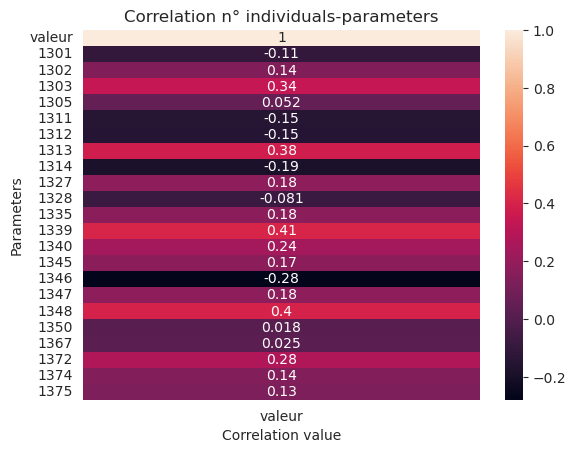

In [53]:
corr = corr_df.drop(columns=["her", "date_year", "liste_ff_id", "taxon_id", "stn_id"]).corr()
x = corr[["valeur"]]
plt.figure()
hm = sns.heatmap(x, annot=True)
hm.set(xlabel='Correlation value', ylabel='Parameters', title = "Correlation n° individuals-parameters")
plt.show()

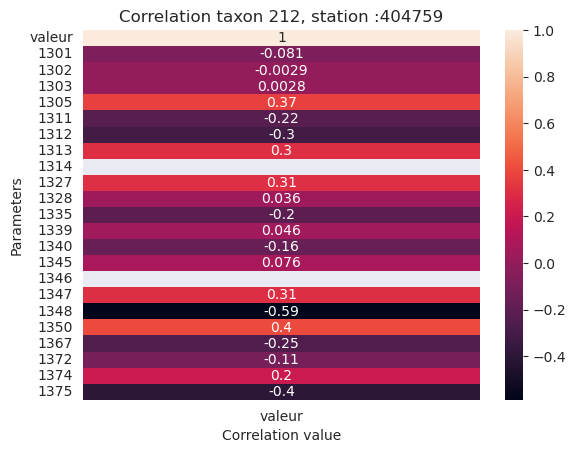

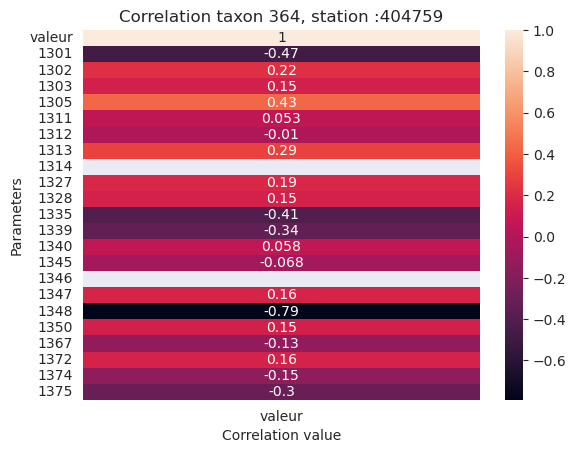

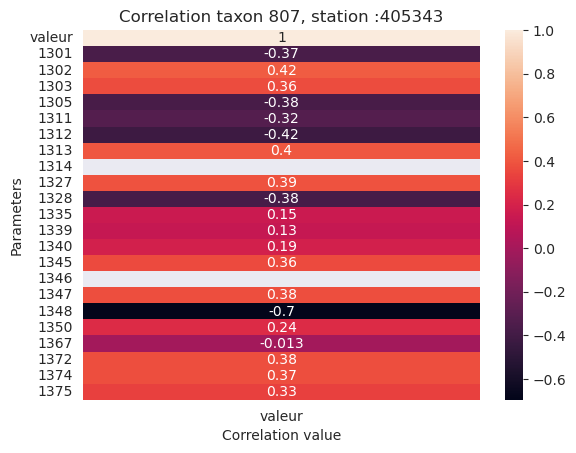

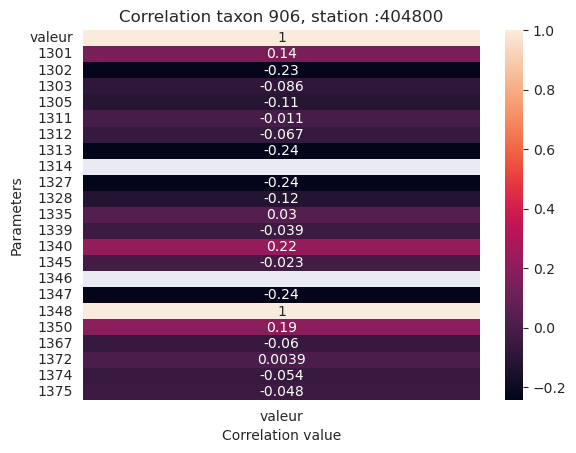

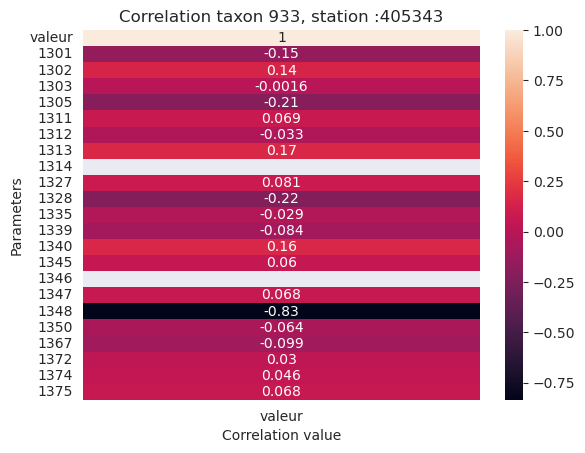

In [86]:
for taxon in taxons_to_keep:

    station = result[result["taxon_id"] == taxon]["stn_id"].value_counts().index[0]
    her = result[result["taxon_id"] == taxon]["her"].value_counts().index[0]

    # corr_df = result[(result["her"] == her) & (result["taxon_id"] == taxon)]
    corr_df = result[(result["stn_id"] == station) & (result["taxon_id"] == taxon)]
    corr = corr_df.drop(columns=["her", "date_year", "liste_ff_id", "taxon_id", "stn_id"]).corr()
    x = corr[["valeur"]]
    plt.figure()
    hm = sns.heatmap(x, annot=True)
    hm.set(xlabel='Correlation value', ylabel='Parameters', title = f"Correlation taxon {taxon}, station :{station}")

    plt.show()

12


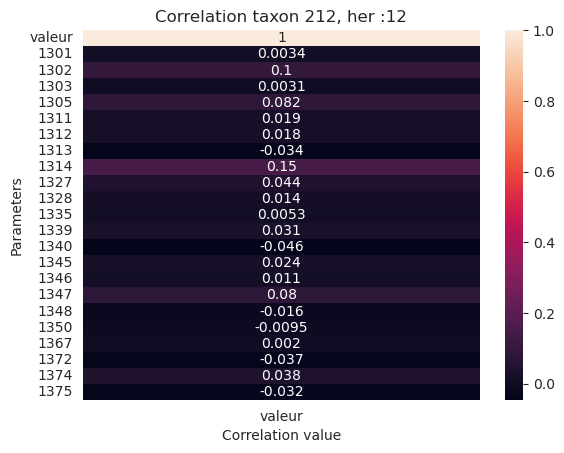

12


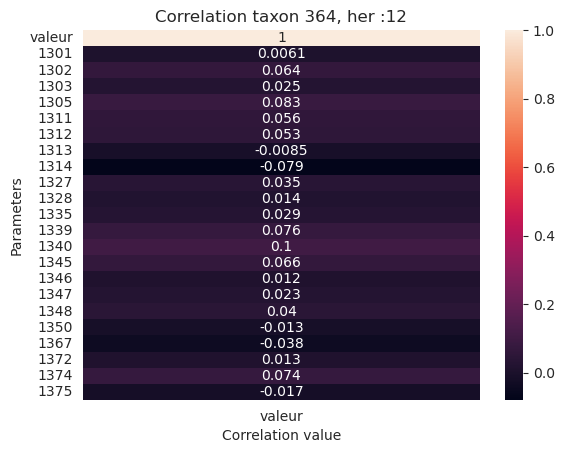

12


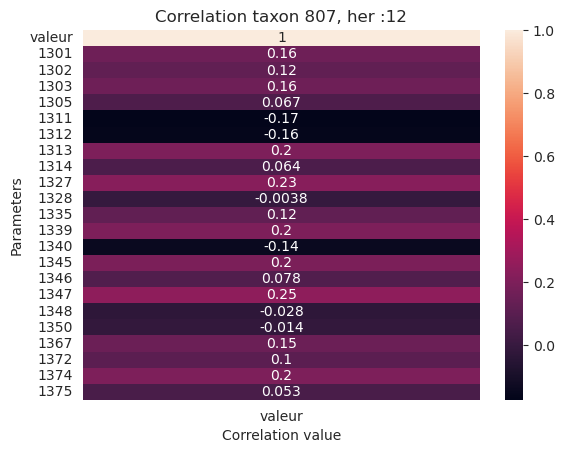

12


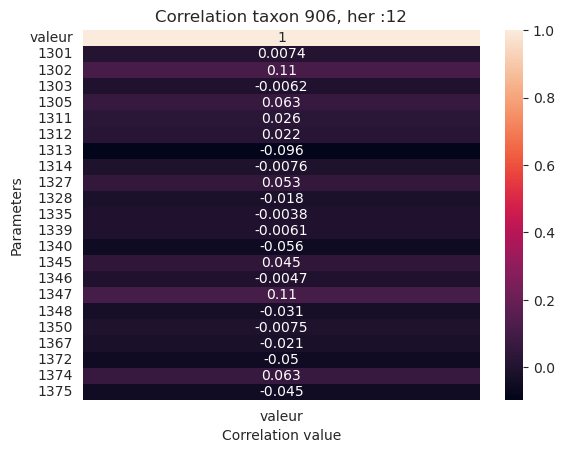

12


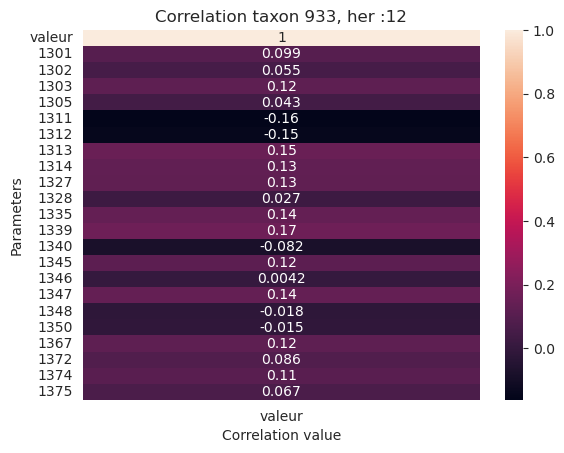

In [89]:
for taxon in taxons_to_keep:

    station = result[result["taxon_id"] == taxon]["stn_id"].value_counts().index[0]
    her = result[result["taxon_id"] == taxon]["her"].value_counts().index[0]
    print(her)
    corr_df = result[(result["her"] == her) & (result["taxon_id"] == taxon)]
    # corr_df = result[(result["stn_id"] == station) & (result["taxon_id"] == taxon)]
    corr = corr_df.drop(columns=["her", "date_year", "liste_ff_id", "taxon_id", "stn_id"]).corr()
    x = corr[["valeur"]]
    plt.figure()
    hm = sns.heatmap(x, annot=True)
    hm.set(xlabel='Correlation value', ylabel='Parameters', title = f"Correlation taxon {taxon}, her :{her}")

    plt.show()